In [52]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [53]:
df_test = pd.read_csv(r"D:\yousef\Master\ML\project\models\multiclass\test_unscaled.csv")
df_train = pd.read_csv(r"D:\yousef\Master\ML\project\models\multiclass\train_unscaled.csv")


In [54]:
X_train = df_train.drop(columns=['label','label_encoded','Bwd PSH Flags',
'Fwd URG Flags',
'Bwd URG Flags',
'FIN Flag Count',
'PSH Flag Count',
'ECE Flag Count',
'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate'
])
y_train = df_train['label_encoded']
X_test = df_test.drop(columns=['label','label_encoded','Bwd PSH Flags',
'Fwd URG Flags',
'Bwd URG Flags',
'FIN Flag Count',
'PSH Flag Count',
'ECE Flag Count',
'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate'
])
y_test = df_test['label_encoded']

In [ ]:
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, pos_label=1)   # 1 = DDoS
    rec  = recall_score(y, y_pred, pos_label=1)
    f1   = f1_score(y, y_pred, pos_label=1)

    print(f"\n{dataset_name} Metrics")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    return acc, prec, rec, f1


In [57]:
def plot_confusion(model, X, y, name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Benign", "DDoS"]
    )
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

et_base = ExtraTreesClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

search = RandomizedSearchCV(
    et_base,
    param_distributions=param_grid,
    n_iter=10,
    scoring="f1",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
best_et = search.best_estimator_



Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
from sklearn.metrics import classification_report
# Test
y_test_pred = best_et.predict(X_test)
print(" Test Set Classification Report")
print(classification_report(
    y_test,
    y_test_pred,
    digits=4
))


📊 Test Set Classification Report
              precision    recall  f1-score   support

           0     0.9983    0.9752    0.9866     19566
           1     0.6533    0.3774    0.4784       734
           2     0.6110    0.7773    0.6842       669
           3     0.8653    0.9464    0.9041      2947
           4     0.9995    0.9946    0.9971     24274
           5     0.6209    0.6935    0.6552       248
           6     0.3596    0.5328    0.4294       137
           7     0.6054    0.7827    0.6827       543
           8     0.9998    0.9879    0.9938      9875
           9     0.9999    0.9936    0.9968     19784
          10     0.9300    0.9577    0.9437      5702
          11     0.9071    0.7548    0.8240      1786
          12     0.0181    1.0000    0.0357        10

    accuracy                         0.9703     86275
   macro avg     0.7360    0.8288    0.7394     86275
weighted avg     0.9776    0.9703    0.9732     86275



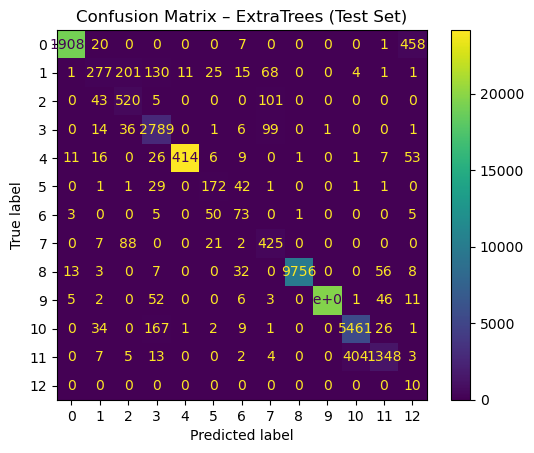

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_test_pred = best_et.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix – ExtraTrees (Test Set)")
plt.show()


In [62]:
joblib.dump(best_et, "D:\yousef\Master\ML\project\models\multiclass_models\extratrees_mult_weight.joblib")


<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Yousef Amr\AppData\Local\Temp\ipykernel_1704\3132181320.py:1: SyntaxWarning: invalid escape sequence '\y'
  joblib.dump(best_et, "D:\yousef\Master\ML\project\models\multiclass_models\extratrees_mult_weight.joblib")


['D:\\yousef\\Master\\ML\\project\\models\\multiclass_models\\extratrees_mult_weight.joblib']

In [ ]:
y_test_pred = best_et2.predict(X_test)
print(" Test Set Classification Report")
print(classification_report(
    y_test,
    y_test_pred,
    digits=4
))

📊 Test Set Classification Report
              precision    recall  f1-score   support

           0     0.9945    0.9994    0.9970     19566
           1     0.7159    0.4360    0.5419       734
           2     0.6129    0.7384    0.6698       669
           3     0.8943    0.9671    0.9292      2947
           4     0.9983    0.9972    0.9978     24274
           5     0.6456    0.7419    0.6904       248
           6     0.6377    0.3212    0.4272       137
           7     0.7105    0.6961    0.7033       543
           8     0.9971    0.9915    0.9943      9875
           9     0.9996    0.9963    0.9979     19784
          10     0.9219    0.9795    0.9498      5702
          11     0.9273    0.7497    0.8291      1786
          12     0.0000    0.0000    0.0000        10

    accuracy                         0.9789     86275
   macro avg     0.7735    0.7396    0.7483     86275
weighted avg     0.9786    0.9789    0.9781     86275



c:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 2000x3500 with 0 Axes>

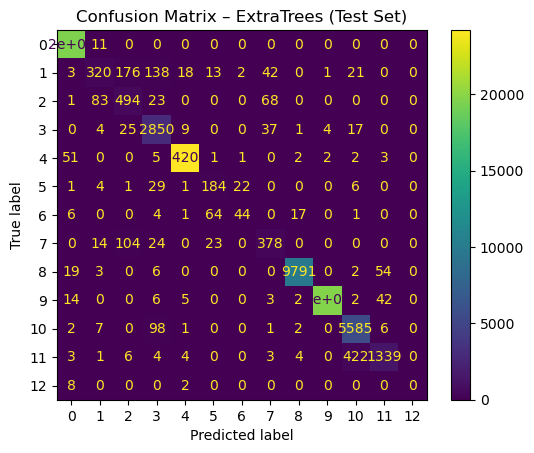

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = best_et2.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(20, 35))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix – ExtraTrees (Test Set)")
plt.show()


In [55]:
joblib.dump(best_et2, "D:\yousef\Master\ML\project\models\multiclass_models\extratrees_mult_2.joblib")


<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Yousef Amr\AppData\Local\Temp\ipykernel_1704\1973259788.py:1: SyntaxWarning: invalid escape sequence '\y'
  joblib.dump(best_et2, "D:\yousef\Master\ML\project\models\multiclass_models\extratrees_mult_weight.joblib")


['D:\\yousef\\Master\\ML\\project\\models\\multiclass_models\\extratrees_mult_weight.joblib']

In [63]:
import joblib

extra_trees_model = joblib.load(
    r"D:\yousef\Master\ML\project\models\multiclass_models\extratrees_mult_weight.joblib"
)


In [ ]:
y_predict=extra_trees_model.predict(X_test)
print(y_predict)

[ 9  4  4 ...  9 10  9]


: 